## Annual Averages

Let's now plot the annual averages. First, let's load our data.

In [1]:
import xarray as xarr

# open datafile
dataFile = "./data/clipped_hourly_single_1988.nc"
data = xarr.open_dataset(dataFile)

# kelvin -> celsius
data["t_celsius"] = data['t2m'] - 273.15

Now, we can calculate the mean in the form of a time series and as a heatmap across the United States.

In [2]:
# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_precipitation = data['tp'].mean(dim='valid_time')

We can now calculate the weighted averages for the time series. Also, a better metric for precipitation might be a cumulative sum of all precipitation at each time interval. Let's find that, and show that as a time series throughout the year.

In [3]:
from cdo import Cdo
cdo = Cdo()

# define output file
outputFile = "./data/spatial_avgs.nc"

spatial_avg_file = cdo.fldmean(input=dataFile, output=outputFile)
spatial_avgs = xarr.open_dataset(outputFile)

# calculate nationwide average, cumulative sum across the year
temp_timeseries = spatial_avgs["t2m"] # convert to celsius
precipitation_timeseries = spatial_avgs["tp"] * 1000 # convert to millimeters

# squeeze
temp_timeseries = temp_timeseries.squeeze()
precipitation_timeseries = precipitation_timeseries.cumsum(dim=["lat", "lon"]).squeeze()

Now, we can plot the data. Let's start with the heatmap across the United States.

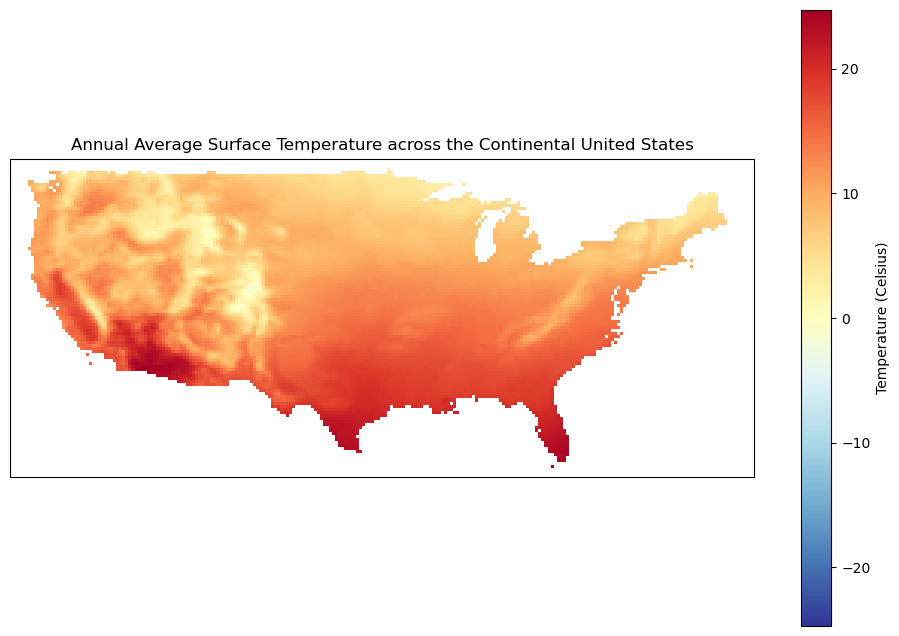

In [4]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Surface Temperature across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Temperature_CONUS_1988.png")
plot.show()

Now, let's do the average precipitation.

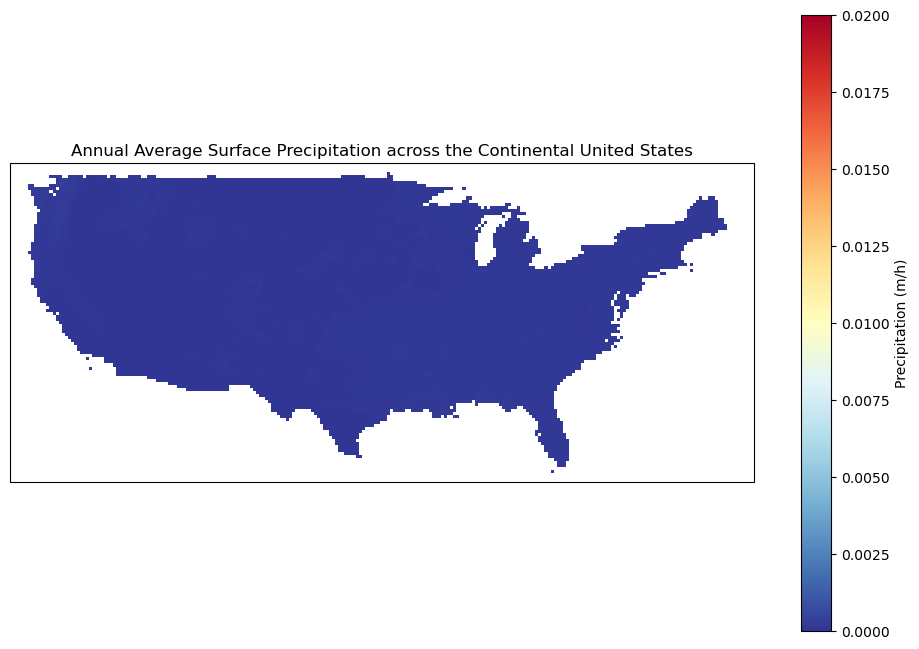

In [5]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
precipitation_plot = mean_precipitation.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=0, vmax=0.02, add_colorbar=True)
precipitation_plot.colorbar.set_label("Precipitation (m/h)")

# plot, show
plot.title("Annual Average Surface Precipitation across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Precipitation_CONUS_1988.png")
plot.show()

(Because precipitation is not constant, the average across the surface is near zero.)

Let's now plot the annual average across the entire continental United States with a graph that shows how temperature changed with time.

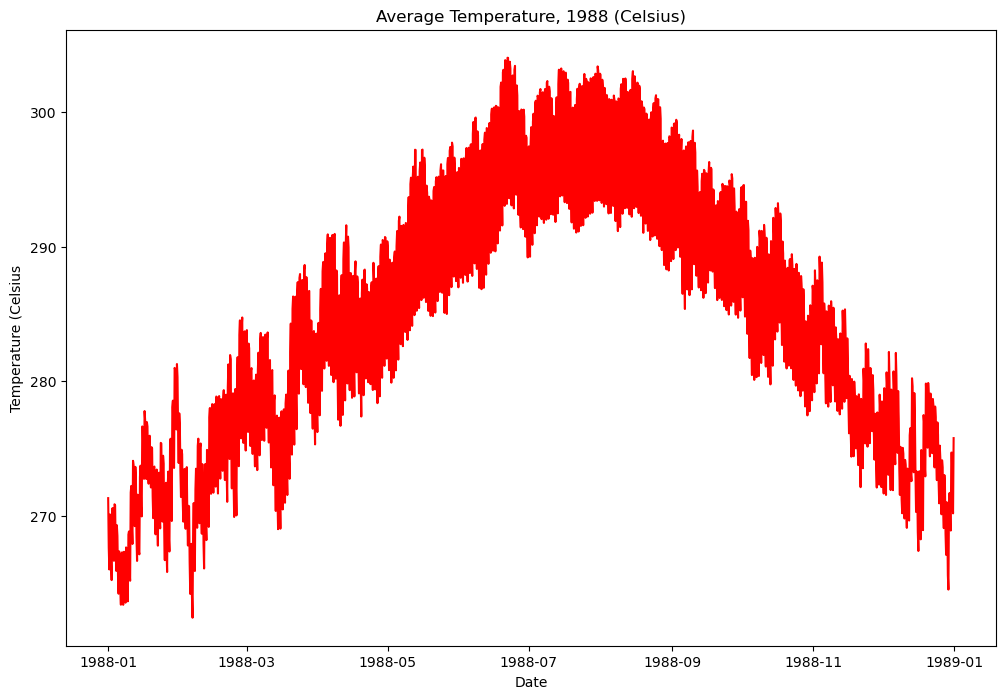

In [6]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel("Temperature (Celsius")
plot.xlabel("Date")
plot.title("Average Temperature, 1988 (Celsius)")
plot.savefig("./plots/Annual_Average_Surface_Temp_TimeSeries_1988.png")
plot.show()

Similarly, we can do the same for precipitation.

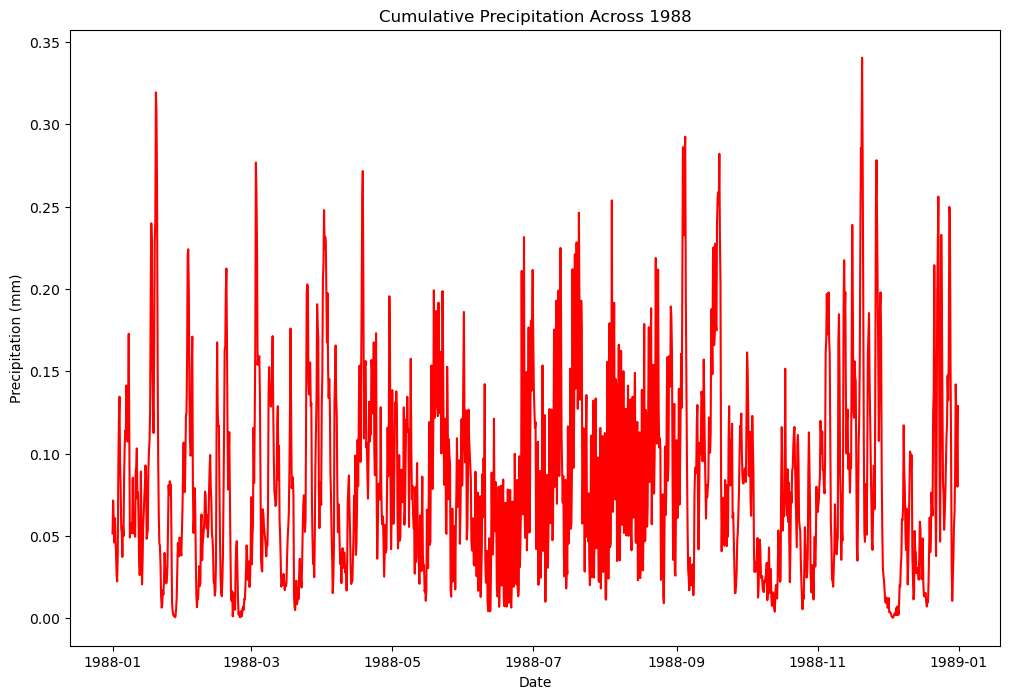

In [7]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(precipitation_timeseries.valid_time, precipitation_timeseries, color="red")

# labels
plot.ylabel("Precipitation (mm)")
plot.xlabel("Date")
plot.title("Cumulative Precipitation Across 1988")
plot.savefig("./plots/Annual_Cumulative_Surface_Precipitation_TimeSeries_1988.png")
plot.show()